In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
%cd "./drive/MyDrive/IE7500_NLP_Group7/nlp-getting-started"

/content/drive/MyDrive/IE7500_NLP_Group7/nlp-getting-started


## **Training Dataset Exploration**

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

df_train = pd.read_csv('train.csv', index_col=0)

In [4]:
# OVERVIEW
print(f"Dataset shape: {df_train.shape}")
print(f"Columns: {list(df_train.columns)}")
print("\nData types:")
print(df_train.dtypes)
print("\nFirst few rows:")
df_train.head(10)

Dataset shape: (7613, 4)
Columns: ['keyword', 'location', 'text', 'target']

Data types:
keyword     object
location    object
text        object
target       int64
dtype: object

First few rows:


,keyword,location,text,target
id,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
14,NaN,NaN,There's an emergency evacuation happening now ...,1


In [5]:
# MISSING VALUES
print("Missing values per column:")
print(df_train.isnull().sum())
print("\nMissing values percentage:")
print((df_train.isnull().sum() / len(df_train)) * 100)

Missing values per column:
keyword       61
location    2533
text           0
target         0
dtype: int64

Missing values percentage:
keyword      0.801261
location    33.272035
text         0.000000
target       0.000000
dtype: float64


In [6]:
# UNIQUE VALUES
print("Number of Unique Values in Each Column")
for col in df_train.columns:
  unique_val= df_train[col].nunique()
  print(f"{col}: {unique_val}")

Number of Unique Values in Each Column
keyword: 221
location: 3341
text: 7503
target: 2


In [7]:
# DISTRIBUTION OF TARGET VALUES
print("\nTarget Distribution Count:")
print(df_train['target'].value_counts())
print("\nTarget Distribution Percentages:")
#print((df_train['target'].value_counts(normalize=True) * 100).round(2))

percentages = df_train['target'].value_counts(normalize=True) * 100
for index, value in percentages.items():
    print(f"{index}: {value:.2f}%")


Target Distribution Count:
target
0    4342
1    3271
Name: count, dtype: int64

Target Distribution Percentages:
0: 57.03%
1: 42.97%


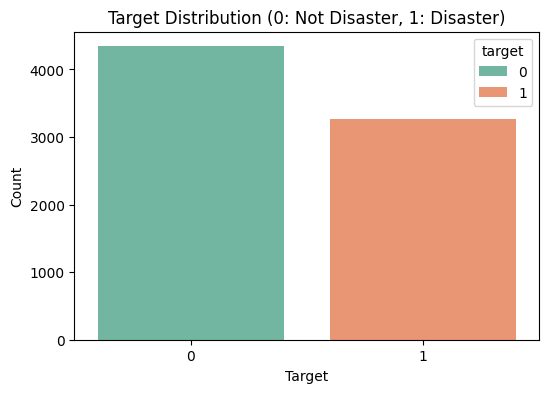

In [ ]:
# VISUALIZE TARGET DISTRIBUTION
plt.figure(figsize=(6, 4))
sns.countplot(data=df_train, x='target', hue='target', palette='Set2')
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target Distribution (0: Not Disaster, 1: Disaster)')
plt.show()

In [8]:
# TEXT LENGTH ANALYSIS
df_train['chara_count'] = df_train['text'].apply(len) # Add character count

df_train['word_count'] = df_train['text'].apply(lambda x: len(x.split())) # Add word count

df_train.head()

,keyword,location,text,target,chara_count,word_count
id,,,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16


In [9]:
# Summary Statistics
df_train.groupby('target')[['chara_count', 'word_count']].describe()

chara_count                                                          \
             count        mean        std   min   25%    50%    75%    max   
target                                                                       
0           4342.0   95.706817  35.885924   7.0  68.0  101.0  130.0  157.0   
1           3271.0  108.113421  29.309854  14.0  88.0  115.0  136.0  151.0   

       word_count                                                    
            count       mean       std  min   25%   50%   75%   max  
target                                                               
0          4342.0  14.704744  6.161564  1.0  10.0  15.0  19.0  31.0  
1          3271.0  15.167533  5.096806  2.0  11.0  15.0  19.0  30.0

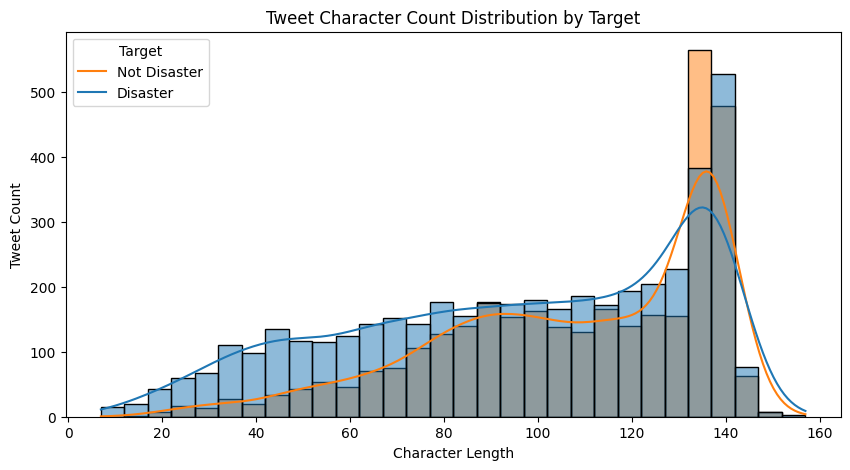

In [ ]:
# Visualize CHARACTER Count Distribution
plt.figure(figsize=(10, 5))
sns.histplot(data=df_train, x='chara_count', hue='target', bins=30, kde=True)
plt.title('Tweet Character Count Distribution by Target')
plt.xlabel('Character Length')
plt.ylabel('Tweet Count')
plt.legend(title='Target', labels=['Not Disaster', 'Disaster'])
plt.show()


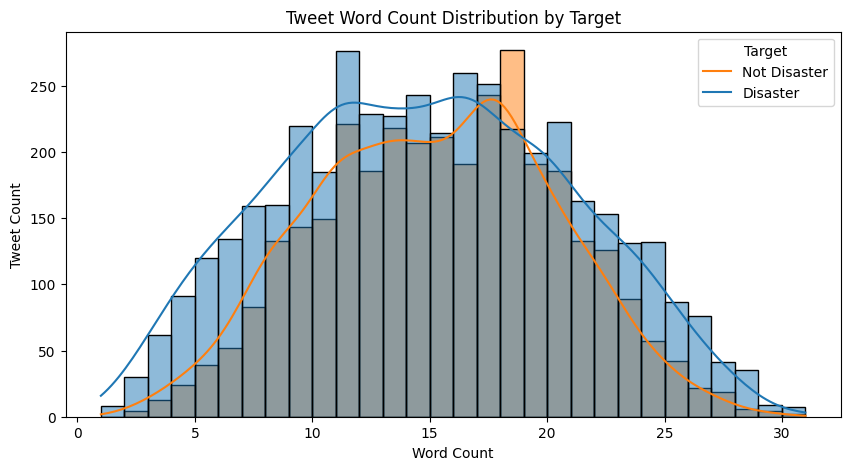

In [ ]:
# Visualize WORD Count Distribution
plt.figure(figsize=(10, 5))
sns.histplot(data=df_train, x='word_count', hue='target', bins=30, kde=True)
plt.title('Tweet Word Count Distribution by Target')
plt.xlabel('Word Count')
plt.ylabel('Tweet Count')
plt.legend(title='Target', labels=['Not Disaster', 'Disaster'])
plt.show()


In [10]:
# MOST COMMON KEYWORDS
print("\nTop 10 Most Common Keywords:")
print("-"*40)
print(df_train['keyword'].value_counts().head(10))


Top 10 Most Common Keywords:
----------------------------------------
keyword
fatalities     45
deluge         42
armageddon     42
damage         41
body%20bags    41
harm           41
sinking        41
evacuate       40
outbreak       40
fear           40
Name: count, dtype: int64


In [11]:
# KEYWORDS BY TARGET FOR TOP 10 KEYWORDS
top_keywords_list = df_train['keyword'].value_counts().head(10).index.tolist()

# Filter dataFrame to include only rows with these top keywords
df_top_keywords = df_train[df_train['keyword'].isin(top_keywords_list)]

# Group by keyword and target and count the occurrences
keyword_target = df_top_keywords.groupby(['keyword', 'target']).size().unstack(fill_value=0)

print("\nKeyword Distribution by Target (Top 10 Keywords):")
print("-"*50)
print(keyword_target)


Keyword Distribution by Target (Top 10 Keywords):
--------------------------------------------------
target        0   1
keyword            
armageddon   37   5
body%20bags  40   1
damage       22  19
deluge       36   6
evacuate     15  25
fatalities   19  26
fear         35   5
harm         37   4
outbreak      1  39
sinking      33   8


In [13]:
# LOCATION ANALYSIS
print(f"Unique locations: {df_train['location'].nunique()}")

print("\nTop 10 Most Common Locations:")
print("-"*40)
print(df_train['location'].value_counts().head(10))

Unique locations: 3341

Top 10 Most Common Locations:
----------------------------------------
location
USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Name: count, dtype: int64


In [14]:
# SAMPLE TWEETS
print("Sample disaster tweets:")
disaster_tweets = df_train[df_train['target'] == 1]['text'].head(5)
for j, tweet in enumerate(disaster_tweets, 1):
    print(f"{j}. {tweet}")

print("\nSample non-disaster tweets:")
non_disaster_tweets = df_train[df_train['target'] == 0]['text'].head(5)
for j, tweet in enumerate(non_disaster_tweets, 1):
    print(f"{j}. {tweet}")

Sample disaster tweets:
1. Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
2. Forest fire near La Ronge Sask. Canada
3. All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
4. 13,000 people receive #wildfires evacuation orders in California 
5. Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school 

Sample non-disaster tweets:
1. What's up man?
2. I love fruits
3. Summer is lovely
4. My car is so fast
5. What a goooooooaaaaaal!!!!!!


In [15]:
# Check for unusual characters or patterns
print("\nTexts with URLs:", df_train['text'].str.contains('http', na=False).sum())
print("Texts with @ mentions:", df_train['text'].str.contains('@', na=False).sum())
print("Texts with hashtags:", df_train['text'].str.contains('#', na=False).sum())


Texts with URLs: 3971
Texts with @ mentions: 2039
Texts with hashtags: 1761
